In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Import and Preparation:

In [18]:
# 1.Import data
train_data = pd.read_csv("C:\\Users\\Shriram\\Downloads\\train_data.csv")
test_data = pd.read_csv("C:\\Users\\Shriram\\Downloads\\test_data.csv")

In [19]:
# First Five records
train_data.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [20]:
test_data.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [21]:
train_data.shape

(27321, 80)

In [22]:
test_data.shape

(11709, 80)

In [23]:
# A concise summery of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [25]:
# 2.Figure out the primary key and look for the requirement of indexing.
# Here UID is primary key and we use UID as index.
train_data = train_data.set_index('UID')
train_data.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [26]:
test_data = test_data.set_index('UID')
test_data.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [27]:
# 3. checking missing values
train_data.isnull().sum()

BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 79, dtype: int64

In [28]:
test_data.isnull().sum()

BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 79, dtype: int64

In [29]:
# Tretement of missing values
# all records of "BLOCKID" column are null and we remove that null records.
train_data = train_data.dropna(how='all', axis=1)
train_data.head()

,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [30]:
test_data = test_data.dropna(how='all', axis=1)
test_data.head()

,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [31]:
# filling null values by using interpolate.
# In dataframe there are lots of features with null values and contineous,hence we use interpolate function for fill null values.
train_data = train_data.interpolate(method='linear')

In [33]:
train_data.isna().sum()

SUMLEVEL       0
COUNTYID       0
STATEID        0
state          0
state_ab       0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 78, dtype: int64

In [34]:
test_data = test_data.interpolate(method='linear')

In [35]:
test_data.isna().sum()

SUMLEVEL       0
COUNTYID       0
STATEID        0
state          0
state_ab       0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 78, dtype: int64

In [36]:
# Drop "SUMLEVEL" column , Because this is not helpful for prediction purpose.
train_data = train_data.drop(['SUMLEVEL'], axis=1)
test_data = test_data.drop(['SUMLEVEL'], axis=1)

### Exploratory Data Analysis (EDA):

##### 4. Perform debt analysis. You may take the following steps:

##### Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. 
 Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent.
 Visulized in tablue.

In [37]:
train_data_location_mort_pct = train_data[(train_data['pct_own']>0.10) & (train_data['second_mortgage']<0.5)].sort_values(by = 'second_mortgage', ascending=False)
train_data_location_mort_pct.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
251185,27,25,Massachusetts,MA,Worcester,Worcester City,City,tract,1610,508,...,30.60147,26.16667,19.21553,262.09529,994.0,0.20247,0.37844,0.11976,0.09341,0.10539
269323,81,36,New York,NY,Corona,Harbor Hills,City,tract,11368,718,...,29.80694,27.66667,18.45616,448.69061,1932.0,0.15618,0.44490,0.14555,0.02357,0.04066
251324,3,24,Maryland,MD,Glen Burnie,Glen Burnie,CDP,tract,21061,410,...,32.53273,30.66667,19.61959,694.10357,2881.0,0.22380,0.58250,0.08321,0.00000,0.01778
235788,57,12,Florida,FL,Tampa,Egypt Lake-leto,City,tract,33614,813,...,34.53924,28.58333,18.56943,814.45000,2684.0,0.11618,0.36953,0.12876,0.09957,0.07339
242304,31,17,Illinois,IL,Chicago,Lincolnwood,Village,tract,60640,773,...,43.85811,39.83333,21.71686,374.52605,1802.0,0.14228,0.41366,0.13852,0.01771,0.09677


In [38]:
train_data_location_mort_pct = train_data_location_mort_pct[['place', 'pct_own', 'second_mortgage', 'lat', 'lng']]
train_data_location_mort_pct

,place,pct_own,second_mortgage,lat,lng
UID,,,,,
251185,Worcester City,0.20247,0.43363,42.254262,-71.800347
269323,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
251324,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
235788,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
242304,Lincolnwood,0.14228,0.28899,41.967289,-87.652434
...,...,...,...,...,...
237040,Wright,0.52701,0.00000,30.433742,-86.658921
242599,Cicero,0.25042,0.00000,41.871338,-87.732009
240274,Columbus City,0.17647,0.00000,32.496750,-84.864563


In [40]:
train_data_location_mort_pct = train_data_location_mort_pct.iloc[0:2500]
train_data_location_mort_pct.head()

,place,pct_own,second_mortgage,lat,lng
UID,,,,,
251185,Worcester City,0.20247,0.43363,42.254262,-71.800347
269323,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
251324,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
235788,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
242304,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


In [42]:
train_data_location_mort_pct.to_csv("explore.csv")

In [23]:
train_data_location_mort_pct.shape

(2500, 5)

##### Use the following bad debt equation: # Bad Debt = P (Second Mortgage ∩ Home Equity Loan) # Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [24]:
train_data['bad_debt']=train_data['second_mortgage']+train_data['home_equity']-train_data['home_equity_second_mortgage']

In [25]:
train_data.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408
246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,...,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274
245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,...,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,...,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426


##### Create pie charts  to show overall debt and bad debt

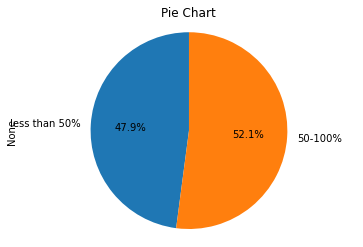

In [26]:
train_data['bins'] = pd.cut(train_data['bad_debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
train_data.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Pie Chart')

plt.show()

##### Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [27]:
# Taking Hamilton, Manhattan and Danville cities data
cols=['second_mortgage','home_equity','debt','bad_debt']
df_box_hamilton = train_data.loc[train_data['city'] == 'Hamilton']
df_box_manhattan = train_data.loc[train_data['city'] == 'Manhattan']
df_box_danville = train_data.loc[train_data['city'] == 'Danville']
df_box_city = pd.concat([df_box_hamilton, df_box_manhattan, df_box_danville])
df_box_city.head()


,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,bins
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,less than 50%
263797,21,34,New Jersey,NJ,Hamilton,Yardville,City,tract,8610,609,...,24.05831,732.58443,3124.0,0.64400,0.56377,0.01980,0.00990,0.04892,0.18071,50-100%
270979,17,39,Ohio,OH,Hamilton,Hamilton City,Village,tract,45015,513,...,22.66500,565.32725,2528.0,0.61278,0.47397,0.04419,0.02663,0.13741,0.15005,50-100%
259028,95,28,Mississippi,MS,Hamilton,Hamilton,CDP,tract,39746,662,...,22.79602,483.01311,1954.0,0.83241,0.58678,0.01052,0.00000,0.11721,0.02130,less than 50%
270984,17,39,Ohio,OH,Hamilton,New Miami,Village,tract,45013,513,...,24.55724,682.81171,2912.0,0.63194,0.55697,0.01322,0.00000,0.15209,0.15651,50-100%


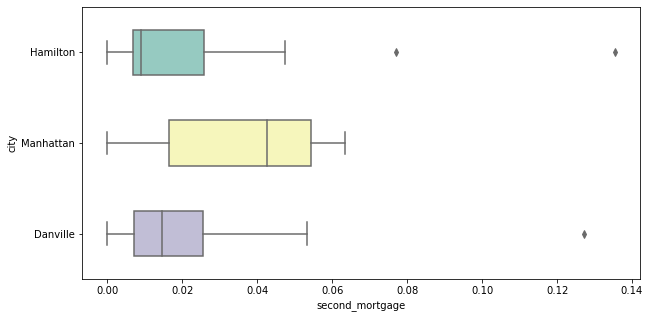

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='second_mortgage', y='city',width=0.5,palette="Set3")
plt.show()

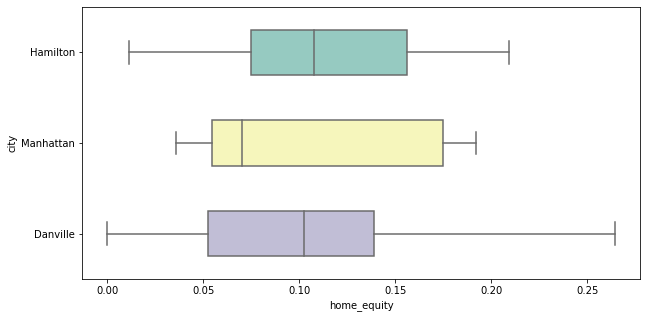

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city',width=0.5,palette="Set3")
plt.show()

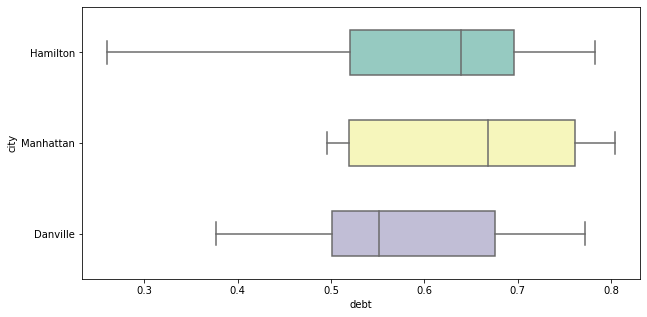

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city',width=0.5,palette="Set3")
plt.show()

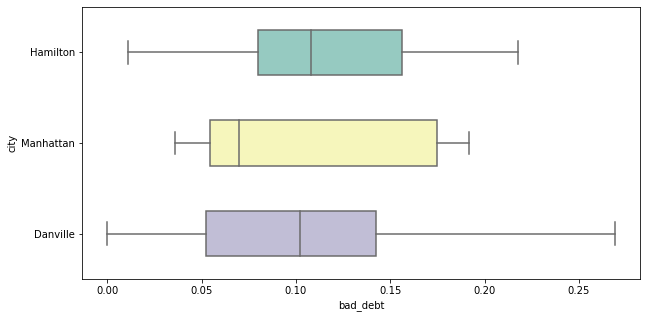

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city',width=0.5,palette="Set3")
plt.show()

##### Create a collated income distribution chart for family income, house hold income, and remaining income

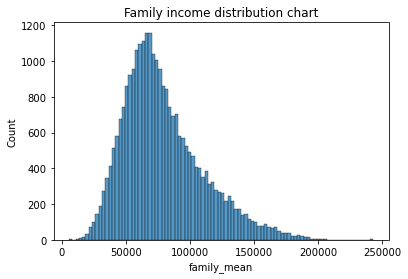

In [51]:
sns.histplot(train_data['family_mean'])
plt.title('Family income distribution chart')
plt.show()

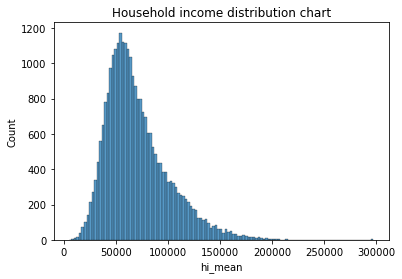

In [53]:
sns.histplot(train_data['hi_mean'])
plt.title('Household income distribution chart')
plt.show()


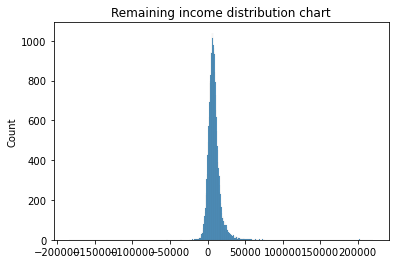

In [55]:
sns.histplot(train_data['family_mean']-train_data['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

##### 5. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

<Figure size 1800x720 with 0 Axes>

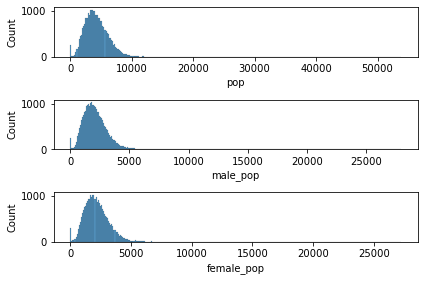

In [59]:
plt.figure(figsize=(25,10))
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.histplot(train_data['pop'],ax=ax1)
sns.histplot(train_data['male_pop'],ax=ax2)
sns.histplot(train_data['female_pop'],ax=ax3)
plt.tight_layout()
plt.show()


<Figure size 1800x720 with 0 Axes>

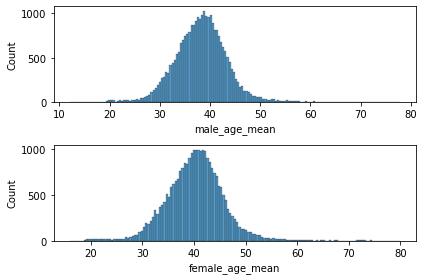

In [60]:
plt.figure(figsize=(25,10))
fig,(ax1,ax2)=plt.subplots(2,1)
sns.histplot(train_data['male_age_mean'],ax=ax1)
sns.histplot(train_data['female_age_mean'],ax=ax2)
plt.tight_layout()
plt.show()

##### Use pop and ALand variables to create a new field called population density

In [125]:
train_data['pop_density']=train_data['pop']/train_data['ALand']
test_data['pop_density']=test_data['pop']/test_data['ALand']

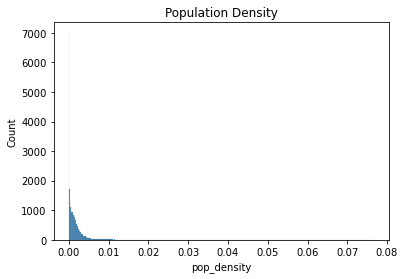

In [66]:
sns.histplot(train_data['pop_density'])
plt.title('Population Density')
plt.show() 
# Very less density is noticed

##### Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [123]:
train_data['age_median']=(train_data['male_age_median']+train_data['female_age_median'])/2
test_data['age_median']=(test_data['male_age_median']+test_data['female_age_median'])/2


In [68]:
train_data[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
UID,,,,,
267822,44.00000,45.33333,2612,2618,44.666665
246444,32.00000,37.58333,1349,1284,34.791665
245683,40.83333,42.83333,3643,3238,41.833330
279653,48.91667,50.58333,1141,1559,49.750000
247218,22.41667,21.58333,2586,3051,22.000000


##### Visualize the findings using appropriate chart type

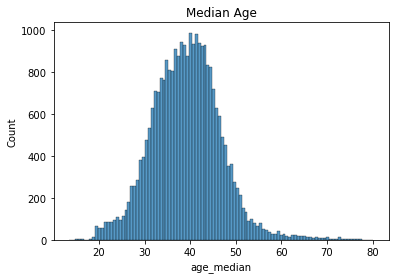

In [69]:
sns.histplot(train_data['age_median'])
plt.title('Median Age')
plt.show()

In [70]:
# Age of population is mostly between 20 and 60
# Majority are of age around 40
# Median age distribution has a gaussian(normal) distribution
# Some right skewness is noticed


C:\Users\Shriram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


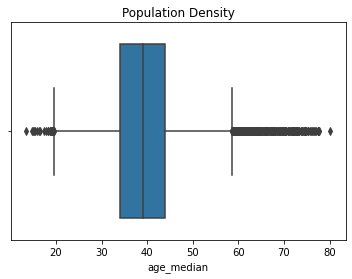

In [76]:
sns.boxplot(train_data['age_median'])
plt.title('Population Density')
plt.show()

##### 6. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [78]:
train_data['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [82]:
train_data['pop_bins'] = pd.cut(train_data['pop'], bins=5, labels=['very low', 'low', 'medium', 'high', 'very_high'])

In [83]:
train_data[['pop', 'pop_bins']].head()

,pop,pop_bins
UID,,
267822,5230,very low
246444,2633,very low
245683,6881,very low
279653,2700,very low
247218,5637,very low


In [84]:
train_data['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very_high        1
Name: pop_bins, dtype: int64

##### Analyze the married, separated, and divorced population for these population brackets

In [85]:
train_data.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very_high,1,1,1


In [87]:
train_data.groupby(by='pop_bins')[['married','separated','divorced']].agg(['mean','median'])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507502  0.525525  0.019133  0.013530  0.100542  0.095610
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very_high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

1.Very high population group has more married people and less percantage of separated and divorced couples
 2.In very low population groups, there are more divorced people

##### Visualize using appropriate chart type

<Figure size 720x360 with 0 Axes>

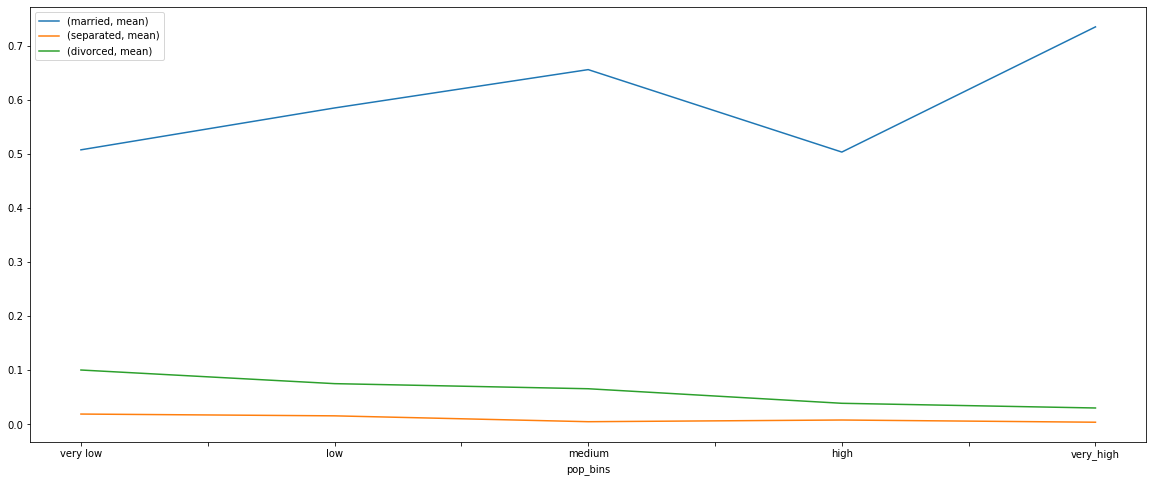

In [89]:
plt.figure(figsize=(10,5))
pop_bin_married=train_data.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

##### 7. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [91]:
rent_state_mean=train_data.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,773.139006
Alaska,1185.763570
Arizona,1097.356267
Arkansas,722.090125
California,1470.949049


In [93]:
income_state_mean=train_data.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67003.826845
Alaska,92136.545109
Arizona,73461.026314
Arkansas,64765.377850
California,87667.612132


In [94]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011539
Alaska                  0.012870
Arizona                 0.014938
Arkansas                0.011149
California              0.016779
Colorado                0.013544
Connecticut             0.012636
Delaware                0.012929
District of Columbia    0.013188
Florida                 0.015752
Name: mean, dtype: float64

In [97]:
#overall level rent as a percentage of income
sum(train_data['rent_mean'])/sum(train_data['family_mean'])

0.01335407608048495

##### 8. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [107]:
cor=train_data[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

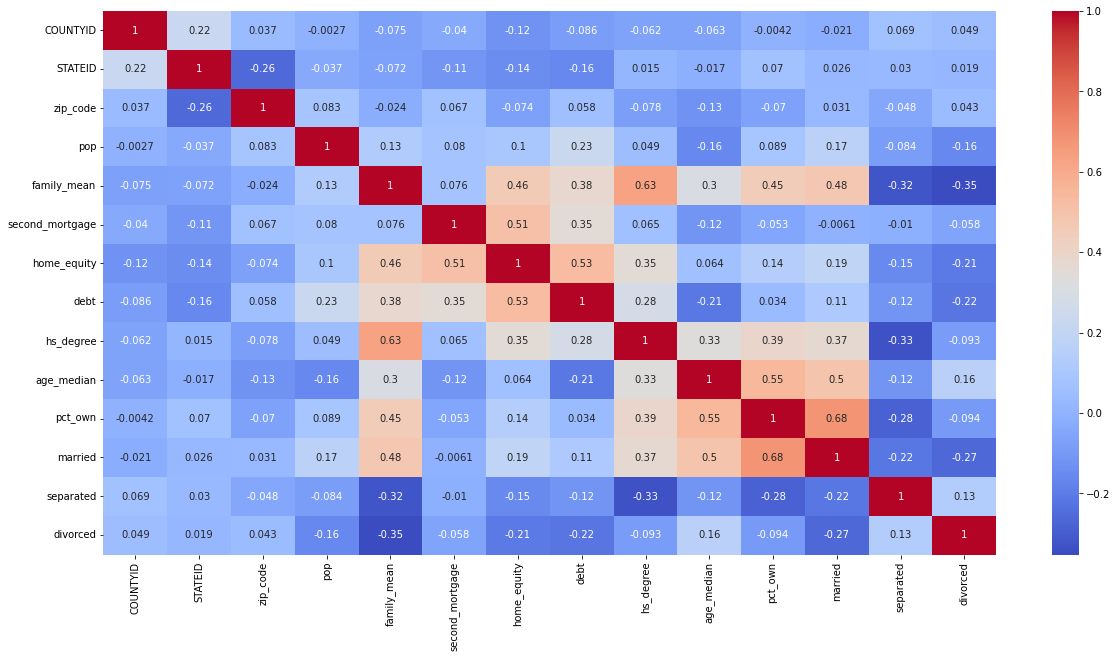

In [108]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

1. High positive correaltion is noticed between pop, male_pop and female_pop
2. High positive correaltion is noticed between rent_mean,hi_mean, family_mean,hc_mean

## Data Pre-processing:

1.The economic multivariate data has a significant number of measured variables. 
The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 
2.Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. 
Each measured variable also includes a component due to independent random variability, known as “specific variance” because 
it is specific to one variable. Obtain the common factors and then plot the loadings. 
Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data.

• Highschool graduation rates • Median population age • Second mortgage statistics • Percent own • Bad debt expense

In [110]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [111]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(train_data.select_dtypes(exclude= ('object','category')))
fa.loadings_

array([[-0.11206998,  0.01935971, -0.0240242 , -0.06333585,  0.04305117],
       [-0.10987668,  0.01275583,  0.02825572, -0.14966143,  0.11042733],
       [-0.08221226,  0.05202544, -0.13655287, -0.04893439, -0.10285295],
       [ 0.01825421,  0.0193869 ,  0.00625678,  0.02650611, -0.00595841],
       [ 0.08923768, -0.09744846, -0.06563888, -0.13232212, -0.14777704],
       [-0.01139646, -0.04157484,  0.14594449,  0.00799742,  0.10706843],
       [-0.04285358, -0.02086669,  0.0365044 , -0.0946748 ,  0.05911728],
       [-0.00245326, -0.01508573, -0.00278711, -0.04565735,  0.02373179],
       [ 0.08008506,  0.95567739, -0.08737229, -0.0062792 , -0.0385181 ],
       [ 0.07457304,  0.91712419, -0.10903778, -0.0276564 , -0.03852776],
       [ 0.08175947,  0.94601319, -0.06110702,  0.01570251, -0.03713396],
       [ 0.76956312,  0.01005414, -0.03698229,  0.11482465, -0.12395177],
       [ 0.71810365,  0.00667665, -0.04600834,  0.1089343 , -0.13550138],
       [ 0.70657416,  0.02400797, -0.0

## Data Modeling :

##### 3. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 

       Please refer deplotment_RE.xlsx. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location.

##### Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean. 

In [113]:
train_data.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [115]:
train_data['type'].unique()
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
train_data.replace(type_dict,inplace=True)


In [117]:
train_data['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [118]:
test_data.replace(type_dict,inplace=True)
test_data['type'].unique()


array([4, 1, 6, 3, 5, 2], dtype=int64)

In [119]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']


In [121]:
x_train=train_data[feature_cols]
y_train=train_data['hc_mortgage_mean']

In [124]:
x_test=test_data[feature_cols]
y_test=test_data['hc_mortgage_mean']

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [127]:
x_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
267822,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.666665,0.79046,0.57851,0.01240,0.08770
246444,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.791665,0.52483,0.34886,0.01426,0.09030
245683,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.833330,0.85331,0.64745,0.01607,0.10657
279653,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,49.750000,0.65037,0.47257,0.02021,0.10106
247218,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,22.000000,0.13046,0.12356,0.00000,0.03109


In [128]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

#####  a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

In [129]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression()

In [130]:
y_pred=linereg.predict(x_test_scaled)

In [131]:
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))


Overall R2 score of linear regression model 0.7330245435833062
Overall RMSE of linear regression model 325.68780071347453


The Accuracy and R2 score are good, but still will investigate the model performance at state level

#####  b) Run another model at State level. There are 52 states in USA.

In [133]:
state=train_data['STATEID'].unique()
state[0:5]
#Picking a few iDs 20,1,45,6

array([36, 18, 72, 20,  1], dtype=int64)

In [134]:
for i in [20,1,45]:
    print("State ID-",i)
    
    x_train_nation=train_data[train_data['COUNTYID']==i][feature_cols]
    y_train_nation=train_data[train_data['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation=test_data[test_data['COUNTYID']==i][feature_cols]
    y_test_nation=test_data[test_data['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.6026557447959976
Overall RMSE of linear regression model for state, 20 :- 340.64921258620234


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.7935964942960722
Overall RMSE of linear regression model for state, 1 :- 321.94909131984696


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7856432617905097
Overall RMSE of linear regression model for state, 45 :- 227.34681299982816




In [135]:
# To check the residuals
residuals=y_test-y_pred
residuals

UID
255504    283.055827
252676    -70.612902
276314    190.392235
248614   -157.350387
286865    -10.637822
             ...    
238088    -66.310328
242811    -42.032376
250127   -128.499431
241096   -331.062445
287763    216.844535
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([4.000e+00, 8.000e+00, 3.200e+01, 7.710e+02, 7.772e+03, 2.746e+03,
        3.110e+02, 5.000e+01, 1.200e+01, 3.000e+00]),
 array([-2517.56569303, -1985.31868417, -1453.0716753 ,  -920.82466644,
         -388.57765757,   143.66935129,   675.91636016,  1208.16336902,
         1740.41037788,  2272.65738675,  2804.90439561]),
 <BarContainer object of 10 artists>)

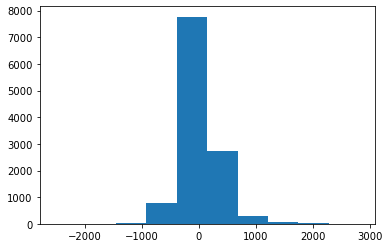

In [136]:
plt.hist(residuals) # Normal distribution of residuals

<AxesSubplot:xlabel='hc_mortgage_mean', ylabel='Count'>

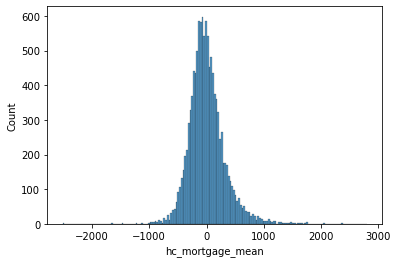

In [137]:
sns.histplot(residuals)

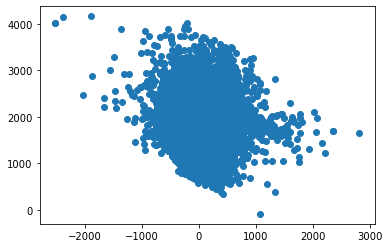

In [138]:
plt.scatter(residuals,y_pred) # Same variance and residuals does not have correlation with predictor
# Independance of residuals